<a href="https://colab.research.google.com/github/7PAM2015-0509-2023-GROUP5/Kaggle_Challenge/blob/main/Kaggle_Challenge_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KAGGLE CHALLENGE** : ( TEAM - 5 )


---
**Team Members** :

1.	Varun Pothu – 21080409 – vp22acb@herts.ac.uk
2.	Balaji Pothuganti – 22023213 – bp22abc@herts.ac.uk
3.	Nikhitha Manika – 22007583 – nm22acl@herts.ac.uk
4.	Deepika Cherupally – 22031854 – dc22abs@herts.ac.uk
5.	Dhana Srivalli Golukonda – 21087223 – dg22abc@herts.ac.uk
6.	Bharath Kumar Savarapu – 22018647 – bs22abu@herts.ac.uk
7.	Anish Teku – 22018647 – at22aej@herts.ac.uk

---



---
> **AIM OF THE PROJECT**
---
> The aim of this assignment is to develop a statistical or machine learning model to predict whether passengers on the Spaceship Titanic were transported to an alternate dimension during a collision with a spacetime anomaly. The model will be trained on a provided dataset and evaluated through a Kaggle Challenge. The objective is to apply and demonstrate knowledge of research methods in data science, including data exploration, model development, and critical analysis of results.


---
> **PROBLEM STATEMENT**

---
> In the year 2912, the Spaceship Titanic, carrying almost 13,000 passengers to newly habitable exoplanets, collided with a spacetime anomaly, causing nearly half of the passengers to be transported to an alternate dimension. Using personal records from the ship's damaged computer system, the task is to predict which passengers were transported to the alternate dimension.

* This prediction will assist rescue crews in retrieving the lost passengers and changing history.

* The challenge involves exploring and visualizing the data, building and customizing a predictive model, and presenting the findings collaboratively as a team.


---
> **DATASET DESCRIPTION**
---

The dataset contains personal records of passengers from the Spaceship Titanic to predict if they were transported to an alternate dimension. The training set (train.csv) includes 8,700 records, and the test set (test.csv) includes 4,300 records. Each record features unique passenger IDs, home planets, cryo-sleep status, cabin details, destination, age, VIP status, and spending amounts on various amenities. The target variable, Transported, indicates if a passenger was transported to another dimension. The sample submission file (sample_submission.csv) shows the required prediction format.

```
DATASET LINK:
https://www.kaggle.com/competitions/spaceship-titanic
```
[LINK FOR DATASET](https://www.kaggle.com/competitions/spaceship-titanic)

---

## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [5]:
import pandas as pd
data_train = "https://raw.githubusercontent.com/7PAM2015-0509-2023-GROUP5/Kaggle_Challenge/main/train.csv"
df_train = pd.read_csv(data_train)
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
# Display information about the dataset
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


In [6]:
data_test = "https://raw.githubusercontent.com/7PAM2015-0509-2023-GROUP5/Kaggle_Challenge/main/test.csv"
df_test = pd.read_csv(data_test)
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [8]:
# Display information about the dataset
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None


## EDA (Exploratory data analysis)

Target Variable

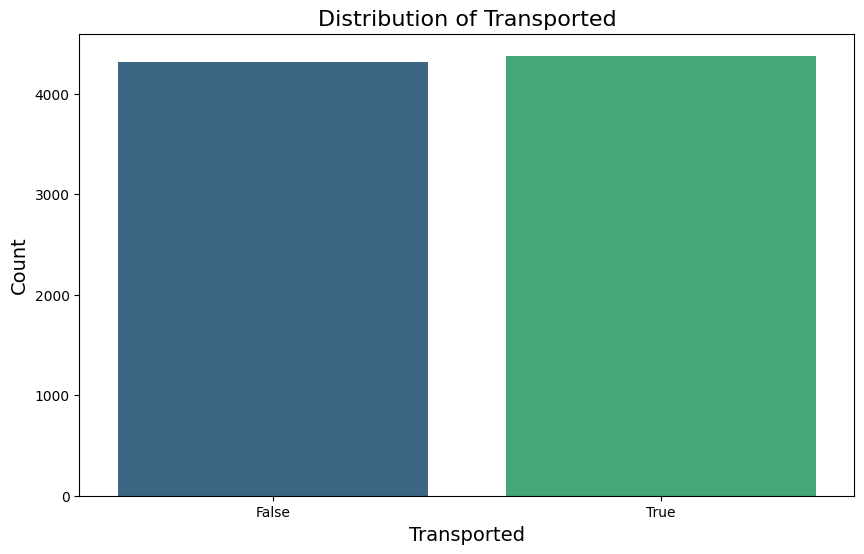

In [17]:
# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Transported', data=df_train, palette='viridis')
plt.title('Distribution of Transported', fontsize=16)
plt.xlabel('Transported', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


Pairplot Distribution with Target Variable

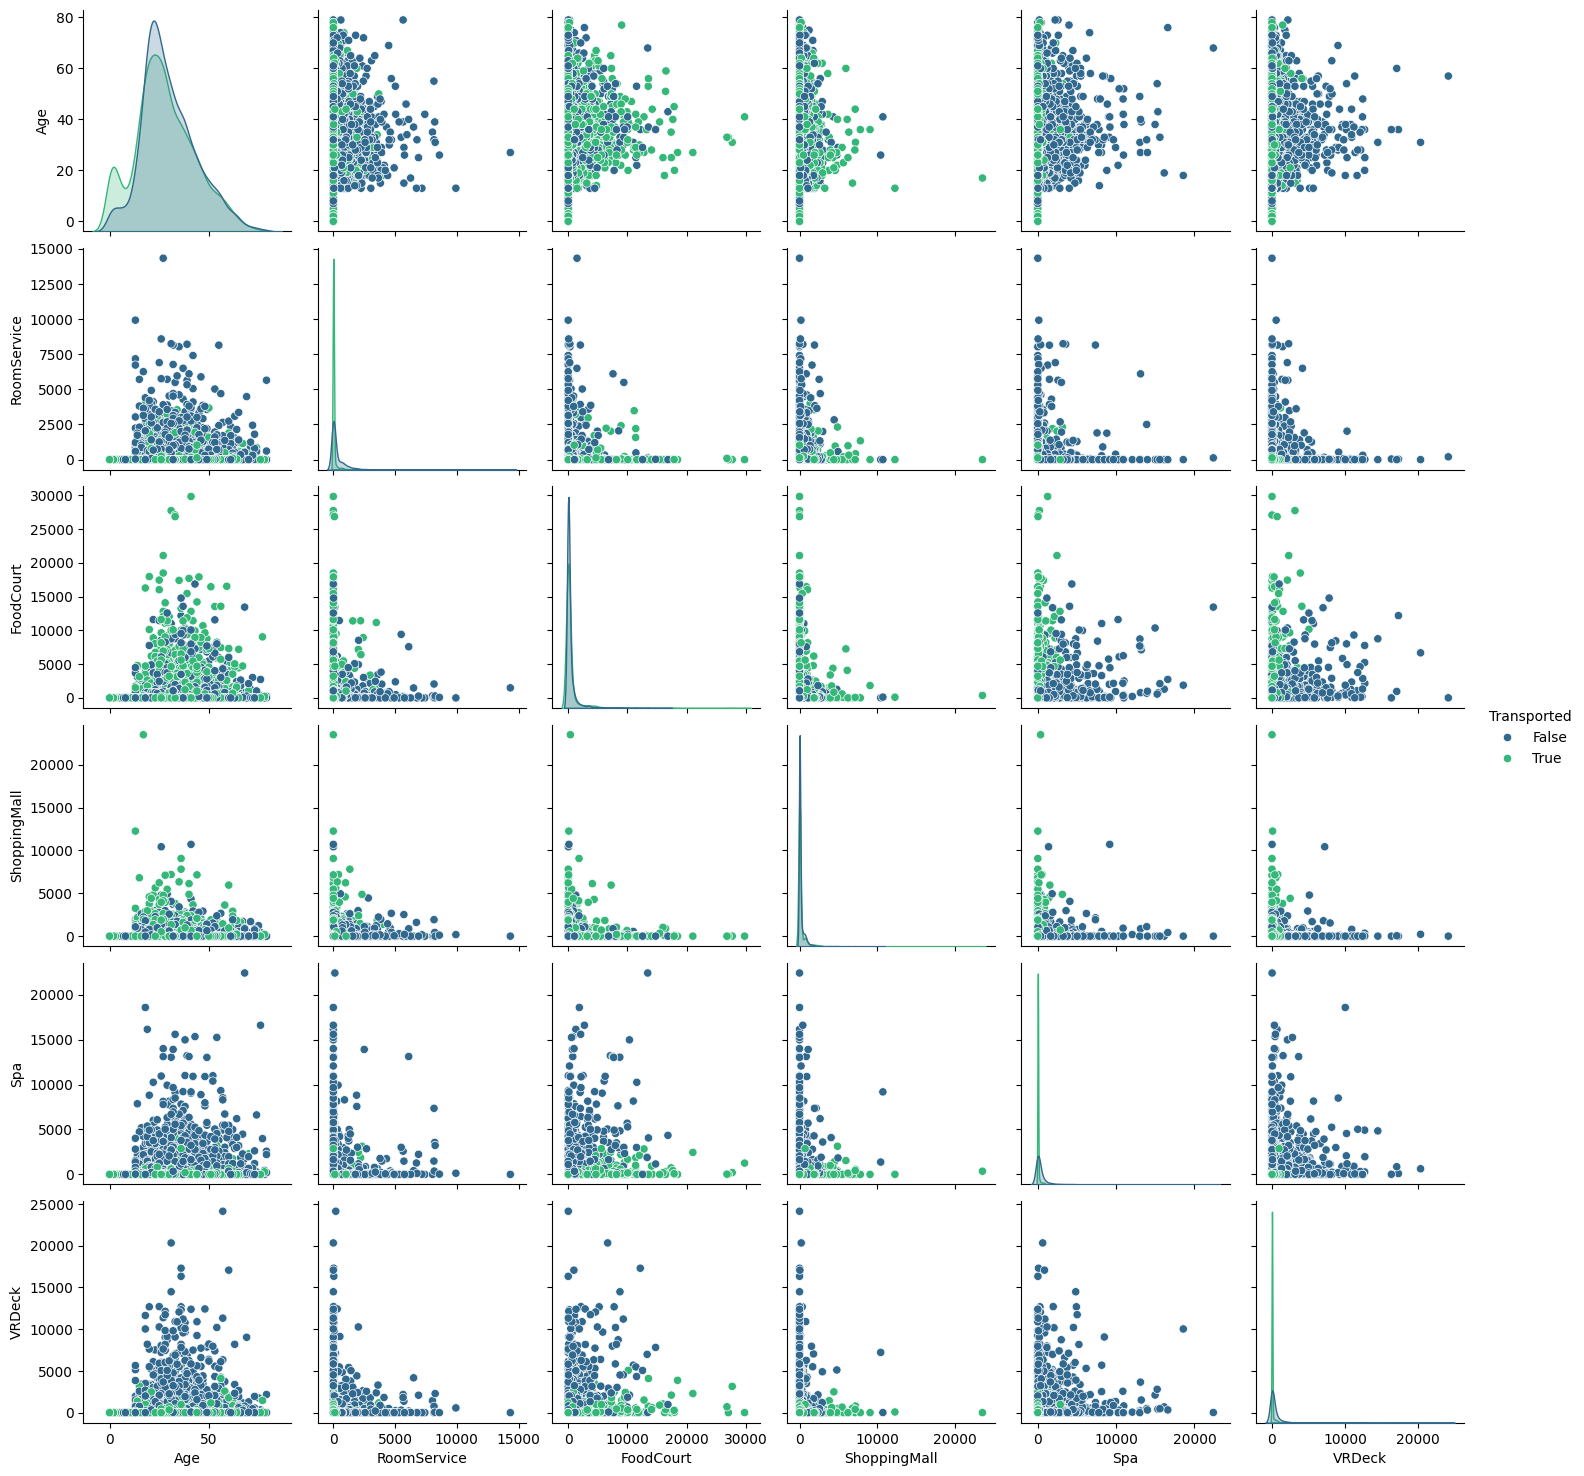

In [19]:
# Pairplot of numerical features
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
sns.pairplot(df_train[numerical_features + ['Transported']], hue='Transported', palette='viridis')
plt.show()


HomePlanet VS Transported

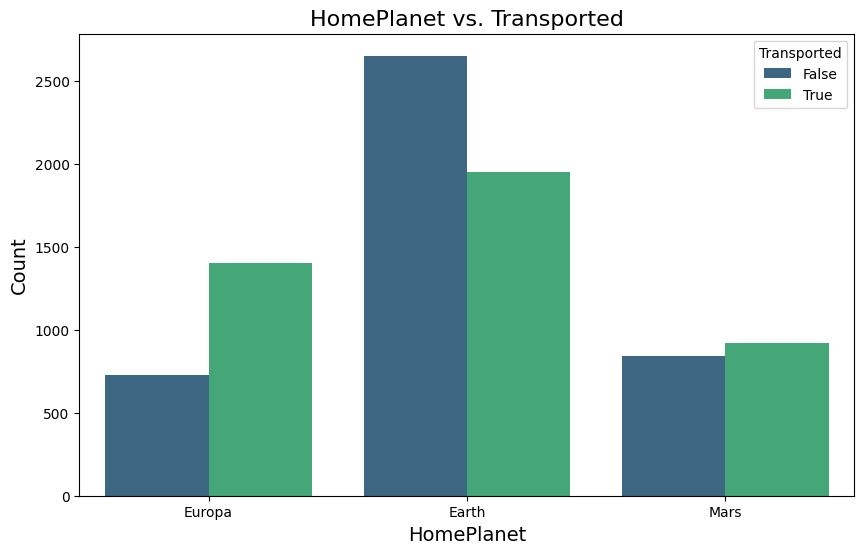

In [20]:
# HomePlanet vs. Transported
plt.figure(figsize=(10, 6))
sns.countplot(x='HomePlanet', hue='Transported', data=df_train, palette='viridis')
plt.title('HomePlanet vs. Transported', fontsize=16)
plt.xlabel('HomePlanet', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


In [22]:
import plotly.graph_objects as go

# Donut chart for HomePlanet
home_planet_counts = df_train['HomePlanet'].value_counts()
fig = go.Figure(data=[go.Pie(labels=home_planet_counts.index, values=home_planet_counts.values, hole=0.3)])
fig.update_traces(marker=dict(colors=['#636EFA', '#EF553B', '#00CC96']))
fig.update_layout(title_text='Distribution of HomePlanets')
fig.show()


In [34]:
import plotly.graph_objects as go

# Assuming df_train is already defined and contains the 'HomePlanet' column
home_planet_counts = df_train['HomePlanet'].value_counts()

fig = go.Figure(data=[go.Pie(labels=home_planet_counts.index, values=home_planet_counts.values, hole=0.3)])
fig.update_traces(marker=dict(colors=['#636EFA', '#EF553B', '#00CC96']))
fig.update_layout(
    title_text='Distribution of HomePlanets',
    margin=dict(t=50, b=50, l=50, r=50)  # Adjust margins to reduce whitespace
)
fig.show()


In [23]:
# Pie chart for Destination
destination_counts = df_train['Destination'].value_counts()
fig = go.Figure(data=[go.Pie(labels=destination_counts.index, values=destination_counts.values)])
fig.update_traces(marker=dict(colors=['#FFA15A', '#19D3F3', '#FF6692']))
fig.update_layout(title_text='Distribution of Destinations')
fig.show()


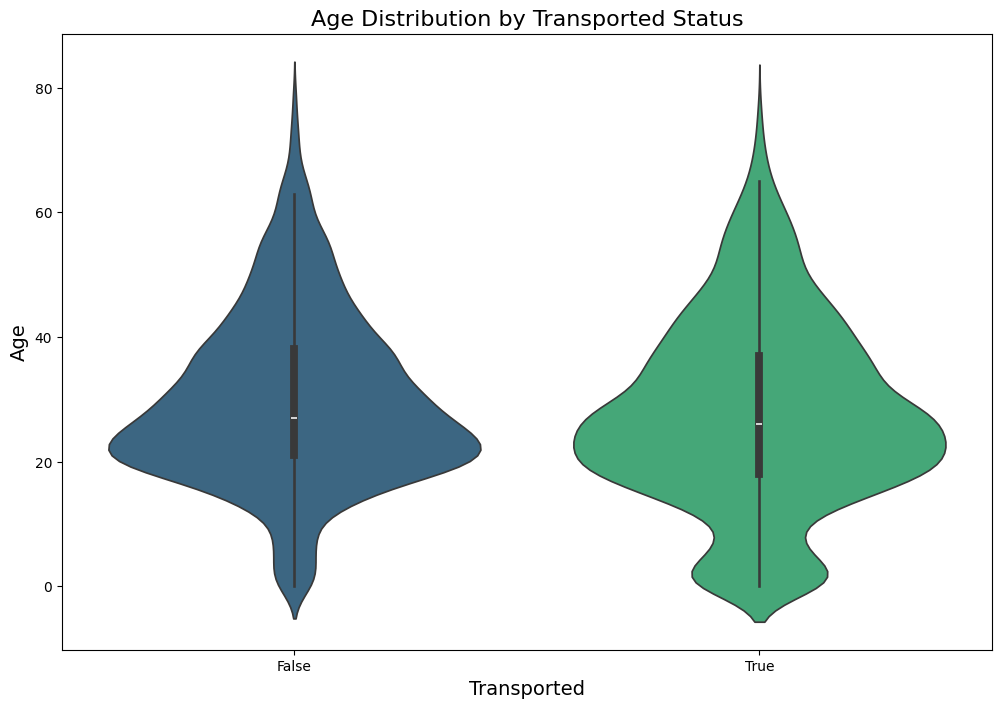

In [31]:
# Violin plot for Age by Transported
plt.figure(figsize=(12, 8))
sns.violinplot(x='Transported', y='Age', data=df_train, palette='viridis')
plt.title('Age Distribution by Transported Status', fontsize=16)
plt.xlabel('Transported', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()


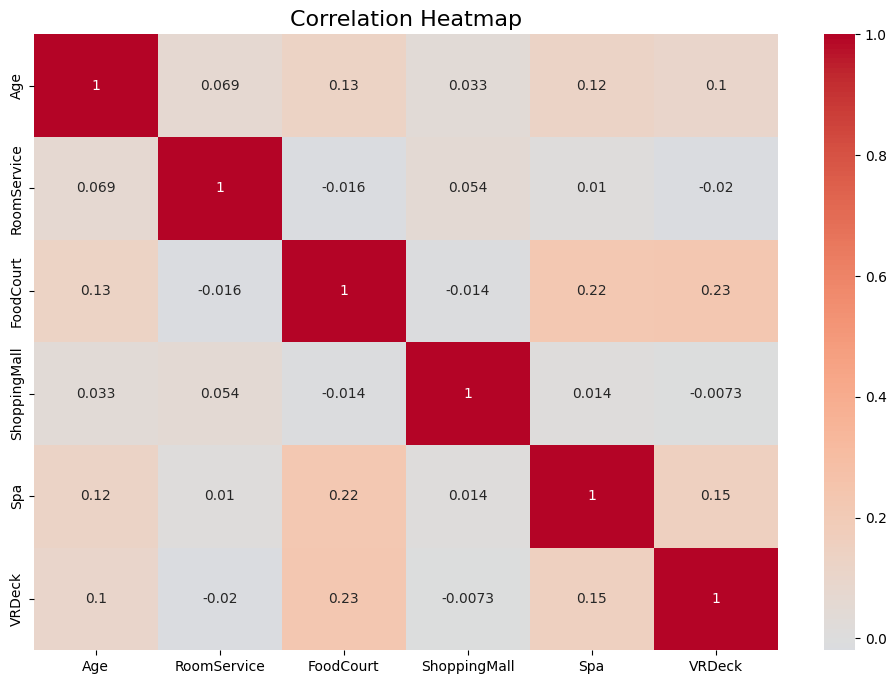

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train is your DataFrame
# Select only numeric columns
numeric_df = df_train.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


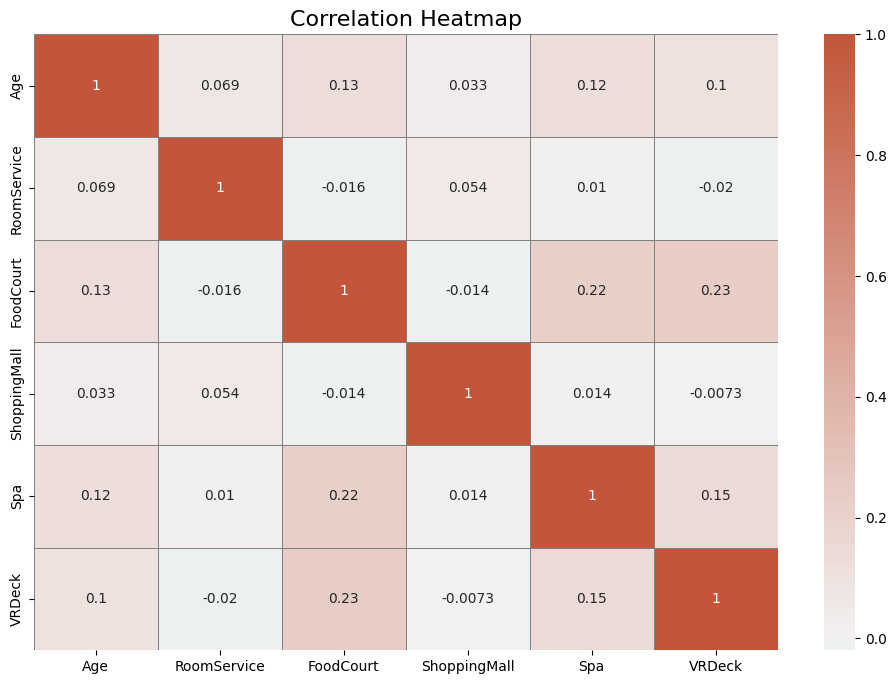

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train is your DataFrame
# Select only numeric columns
numeric_df = df_train.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Create a custom colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap=cmap, center=0, linewidths=0.5, linecolor='gray')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


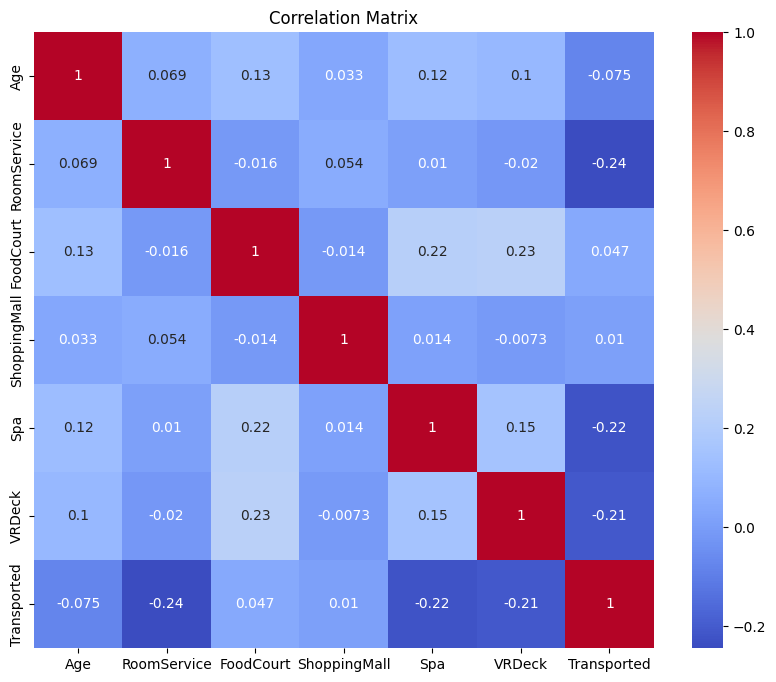

In [38]:
# Add the target variable to the numerical features dataframe
num_features_with_target = numerical_features + ['Transported']

# Calculate the correlation matrix
correlation_matrix = df_train[num_features_with_target].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Data Pre-Processing

## Data Modelling

## Analysis & XAI

## Data Predictions

## Kaggle Submisson File